In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_cpi = pd.read_csv('./data/Combined_cpi_data.csv')
df_cpi = df_cpi.iloc[:,1:]

In [3]:
df_cpi['year_month'] = df_cpi.Year.astype(str) +'-'+ df_cpi.Month
df_cpi['year_month'] = pd.to_datetime(df_cpi.year_month,format='%Y-%b').dt.strftime('%Y-%m')
df_cpi = df_cpi.sort_values(by='year_month',ascending=True).reset_index(drop=True)
df_cpi['city'] = df_cpi.city.map(lambda x: x.capitalize().replace(' cpi.xlsx',''))

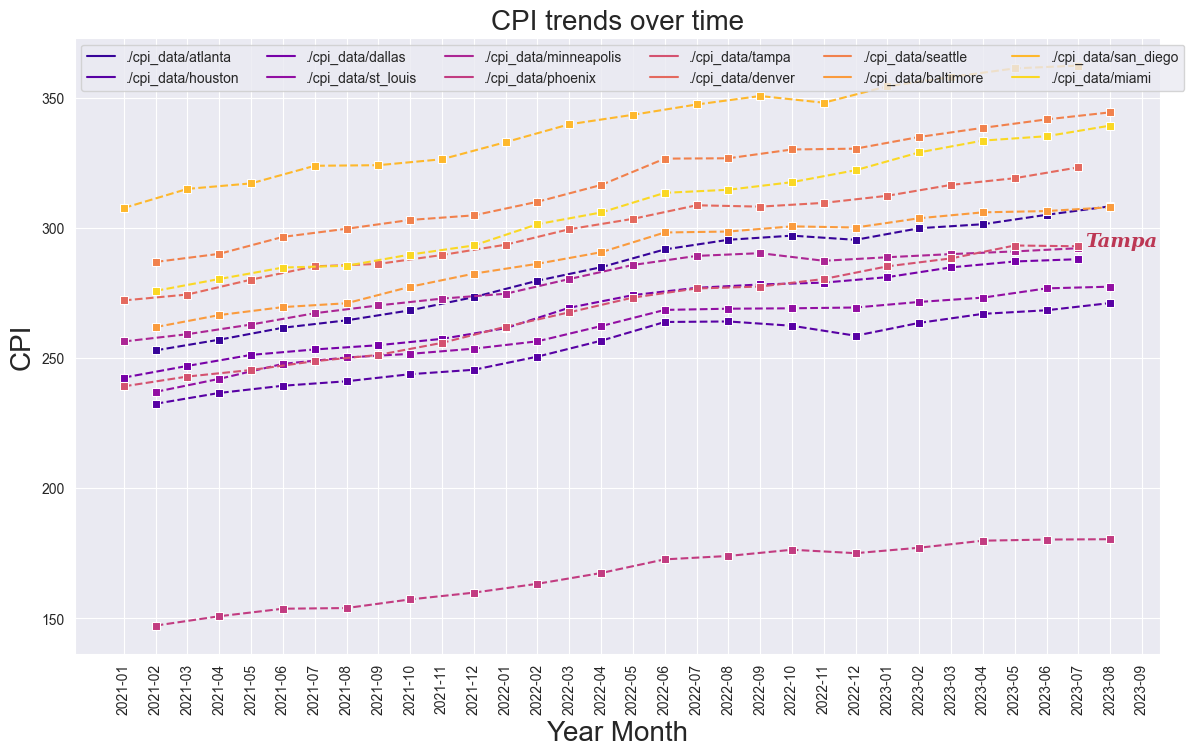

In [4]:
plt.figure(figsize=(14, 8)) 
font_properties = {
    'family': 'serif',  # Font family (e.g., 'serif', 'sans-serif', 'monospace')
    'color': '#bc3754',    # Text color
    'weight': 'bold',   # Font weight ('normal', 'bold', 'heavy', 'light')
    'size': 14,         # Font size
    'style': 'italic'   # Font style ('normal', 'italic', 'oblique')
}
sns.set_style('darkgrid',)
sns.lineplot(y='Value',x='year_month',data=df_cpi[df_cpi.city!='Tampa'],linestyle='--',hue='city',dashes=True,palette='plasma',marker='s')
sns.lineplot(y='Value',x='year_month',data=df_cpi[df_cpi.city=='Tampa'],hue='city',linewidth=3,dashes=True,palette='inferno',marker='s')
plt.xticks(rotation=90)
plt.ylabel('CPI',size=20)
plt.text(x=30.2,y=293,s="Tampa",fontdict=font_properties)
plt.xlabel('Year Month',size=20)
plt.title('CPI trends over time',size=20)
plt.legend(loc='upper left', ncol=6)
plt.show()

In [5]:
df_cpi_1 = df_cpi.fillna(0)
df_cpi_1 = df_cpi_1[df_cpi_1.Value>0]

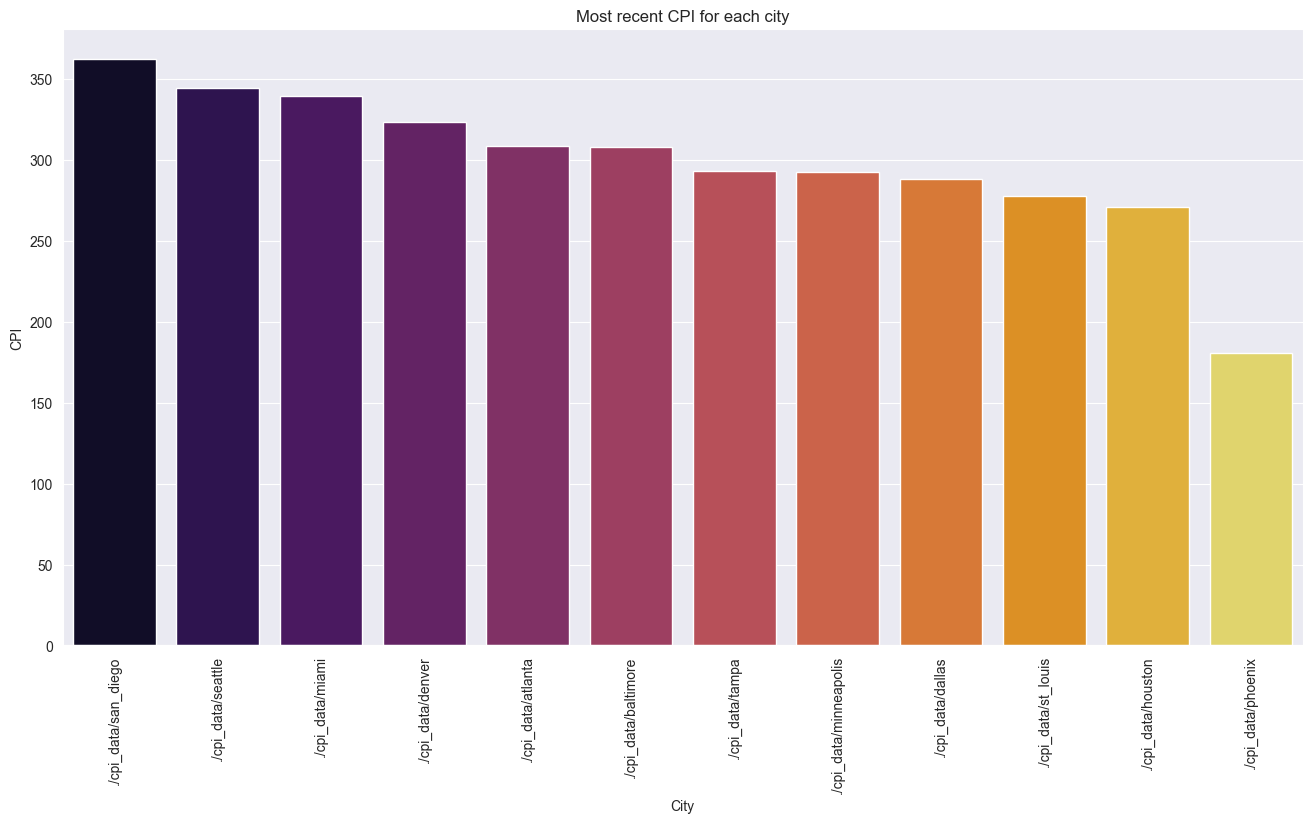

In [6]:
latest_cpi = df_cpi_1.sort_values(by='year_month',ascending=False).drop_duplicates('city')
plt.figure(figsize=(16, 8)) 
sns.barplot(data = latest_cpi,x='city',y='Value',palette='inferno',
            order=latest_cpi.sort_values(by='Value',ascending=False).city.values)
plt.ylabel('CPI')
plt.xlabel('City')
plt.title('Most recent CPI for each city')
plt.xticks(rotation=90)
plt.show()

In [7]:
a = pd.concat([df_cpi_1,df_cpi_1.groupby(['city']).shift(-1).Value],axis=1).sort_values(by=['city','year_month'])

In [8]:
a.columns = ['Year','Month','CPI','city','year_month','CPI_next']

In [9]:
a['r_inc'] = a[['CPI','CPI_next']].apply(lambda x: 100 * (x[1]-x[0])/x[0],axis=1)

In [10]:
a = a.groupby(['city']).agg(avg_per_increase = ('r_inc',pd.Series.mean)).reset_index()\
.sort_values(by='avg_per_increase',ascending=False)

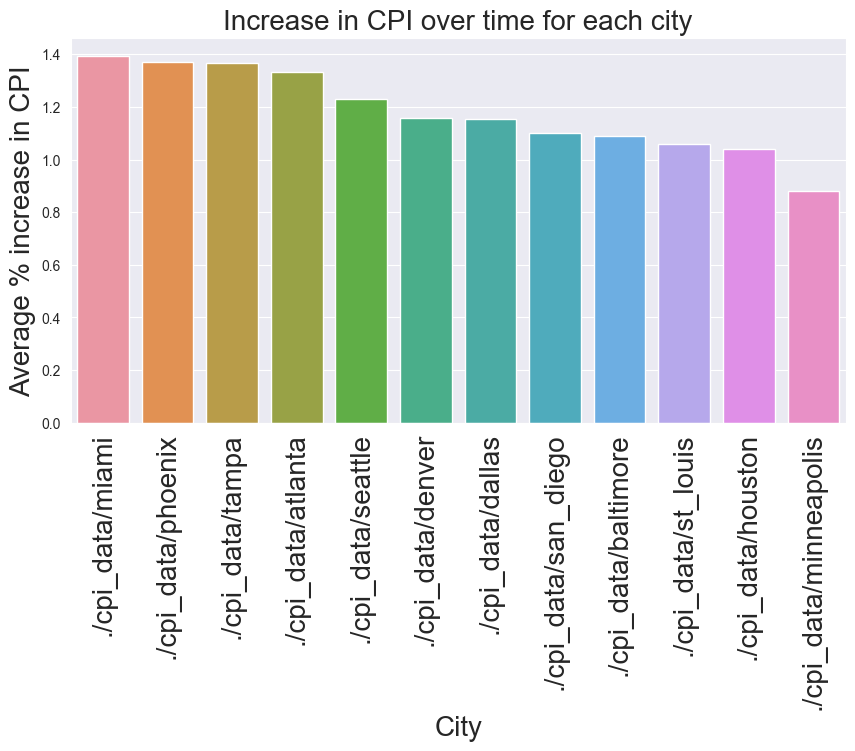

In [11]:
plt.figure(figsize=(10, 5)) 
sns.barplot(x='city',y='avg_per_increase',data=a)
plt.xticks(rotation=90,size=20)

plt.ylabel('Average % increase in CPI',size=20)
plt.xlabel('City',size=20)
plt.title('Increase in CPI over time for each city',size=20)
plt.show()

In [12]:
data2 = pd.read_csv('./data/data_wage.csv')

In [14]:
all_occ = data2[data2.OCC_TITLE == 'All Occupations']

In [15]:
all_occ['H_MEAN'] = all_occ.H_MEAN.astype(float)

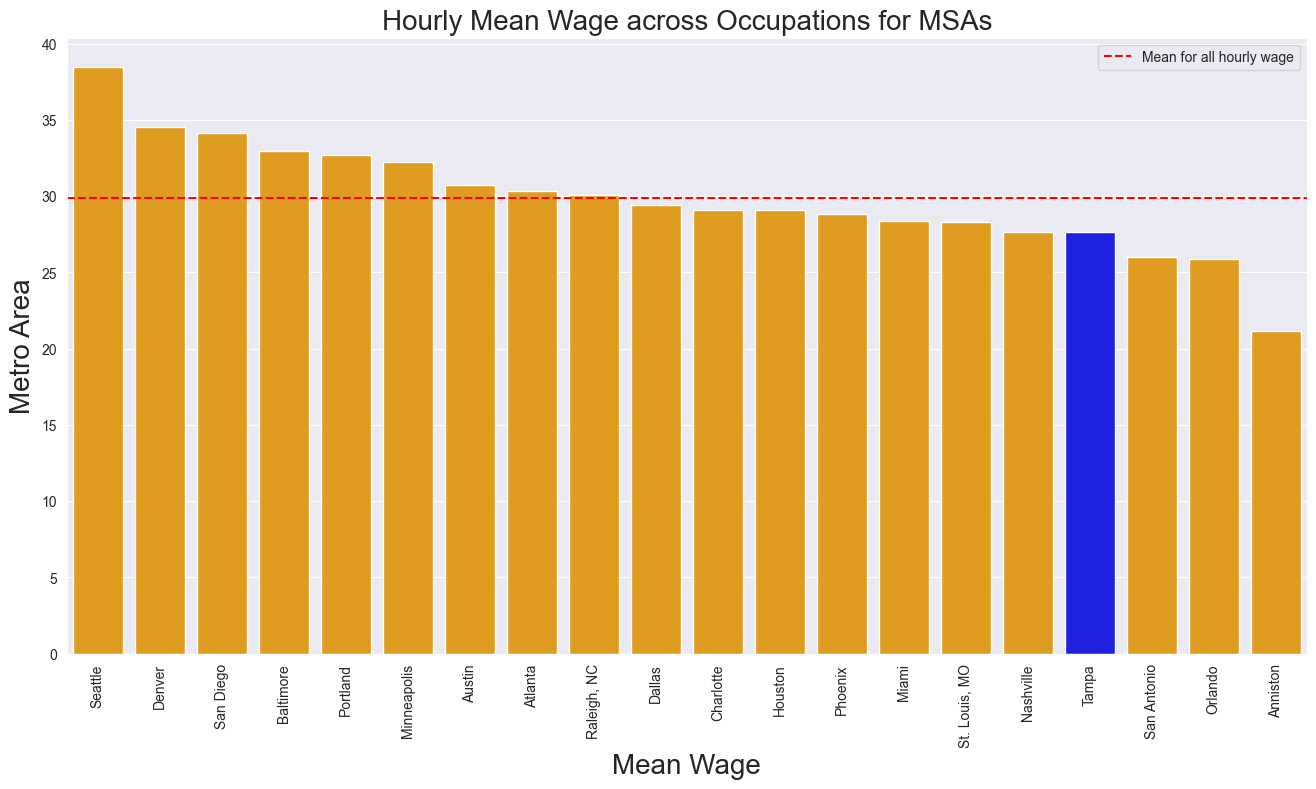

In [16]:
avg_hour_mean = all_occ['H_MEAN'].mean()
clrs = ['blue' if x=='Tampa' else 'orange' for x in all_occ.sort_values(by='H_MEAN',ascending=False).Metro_Name ]
plt.figure(figsize=(16, 8)) 
sns.barplot(data=all_occ, x='Metro_Name',y='H_MEAN',palette=clrs,order=all_occ.sort_values(by='H_MEAN',ascending=False).Metro_Name)
plt.xticks(rotation=90)
plt.axhline(y=avg_hour_mean, color='red', linestyle='--', label='Mean for all hourly wage')
plt.title('Hourly Mean Wage across Occupations for MSAs',size=20)
plt.xlabel('Mean Wage',size=20)
plt.ylabel('Metro Area',size=20)
plt.legend()
plt.show()

In [17]:
tampa = data2[data2.Metro_Name == 'Tampa']
tampa = tampa[~tampa.H_MEAN.isin(['*','#'])]
tampa['H_MEAN'] = tampa.H_MEAN.astype(float)

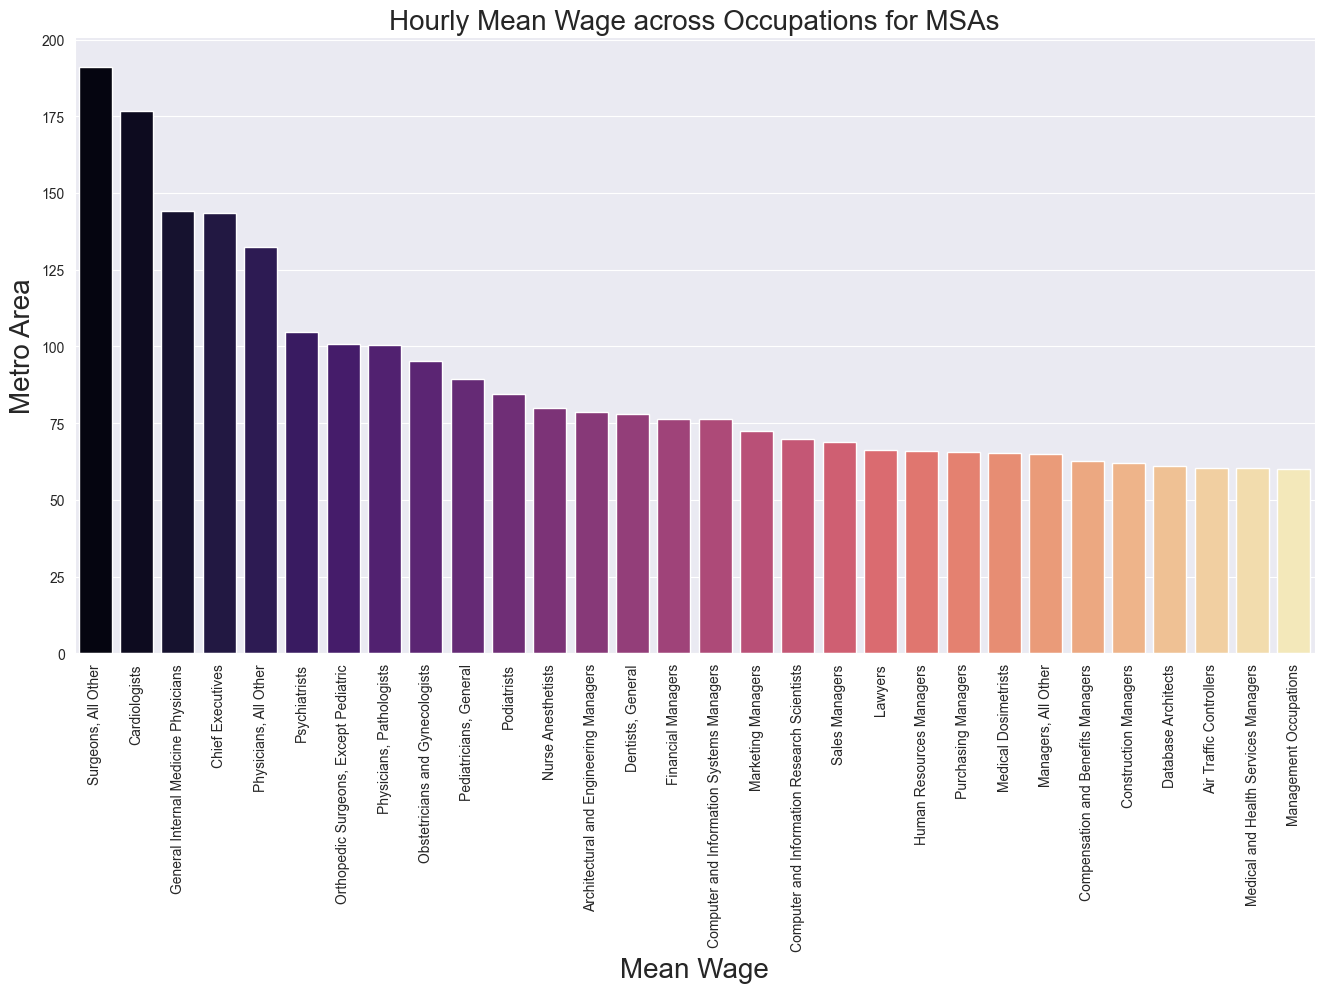

In [18]:
plt.figure(figsize=(16, 8)) 
top_20 = tampa.sort_values(by='H_MEAN',ascending=False)[:30]
sns.barplot(data=top_20, x='OCC_TITLE',y='H_MEAN',palette='magma',order=top_20.OCC_TITLE)
plt.xticks(rotation=90)
#plt.axhline(y=avg_hour_mean, color='red', linestyle='--', label='Mean for all hourly wage')
plt.title('Hourly Mean Wage across Occupations for MSAs',size=20)
plt.xlabel('Mean Wage',size=20)
plt.ylabel('Metro Area',size=20)
#plt.legend()
plt.show()

In [19]:
def convert_type(x):
    try:
        return float(x)
    except:
        return 0

In [20]:
tampa['JOBS_1000'] = tampa['JOBS_1000'].map(lambda x: convert_type(x))

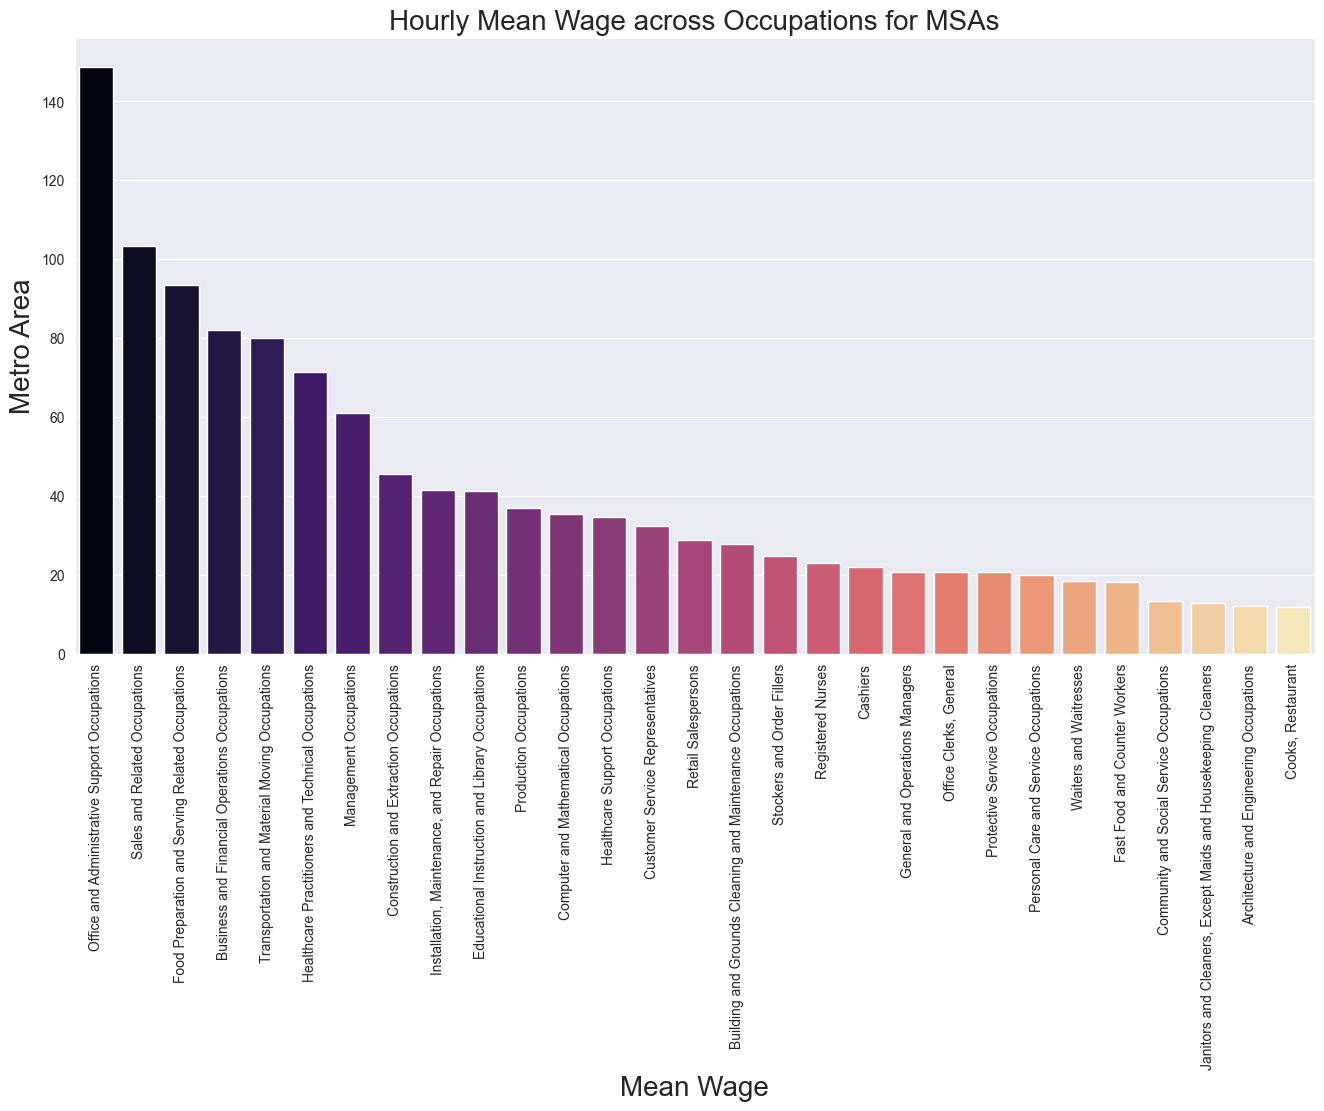

In [21]:
plt.figure(figsize=(16, 8)) 
top_20 = tampa.sort_values(by='JOBS_1000',ascending=False)[1:30]
sns.barplot(data=top_20, x='OCC_TITLE',y='JOBS_1000',palette='magma',order=top_20.OCC_TITLE)
plt.xticks(rotation=90)
#plt.axhline(y=avg_hour_mean, color='red', linestyle='--', label='Mean for all hourly wage')
plt.title('Hourly Mean Wage across Occupations for MSAs',size=20)
plt.xlabel('Mean Wage',size=20)
plt.ylabel('Metro Area',size=20)
#plt.legend()
plt.show()

In [22]:
for i in data2.columns[3:-1]:
    data2[i] = data2[i].map(lambda x:convert_type(x))

In [23]:
top_20_occs = data2[data2.JOBS_1000!=1000].groupby(['OCC_TITLE']).agg(JOBS_per_capita = ('JOBS_1000',pd.Series.median))\
.sort_values(by='JOBS_per_capita',ascending=False).reset_index()[:20]

<Axes: xlabel='JOBS_per_capita', ylabel='OCC_TITLE'>

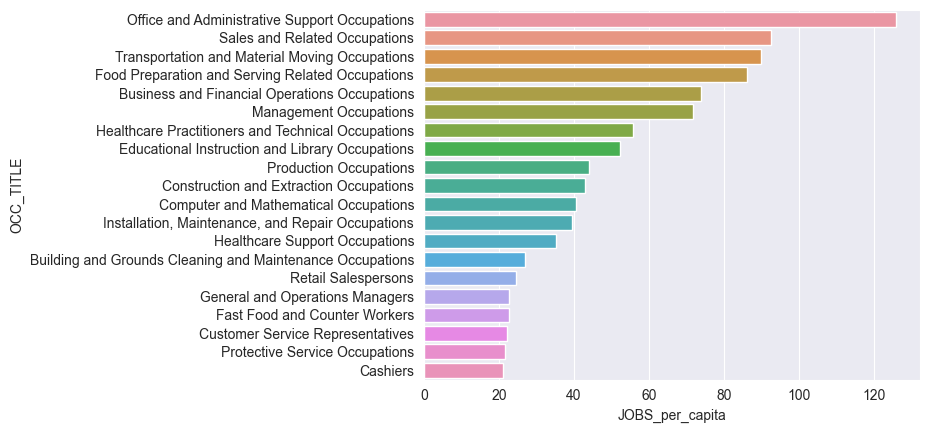

In [24]:
sns.barplot(x='JOBS_per_capita',y='OCC_TITLE',data=top_20_occs)

In [25]:
occ = data2[data2.OCC_TITLE.isin(['Sales and Related Occupations'])]

<Axes: xlabel='H_MEAN', ylabel='Metro_Name'>

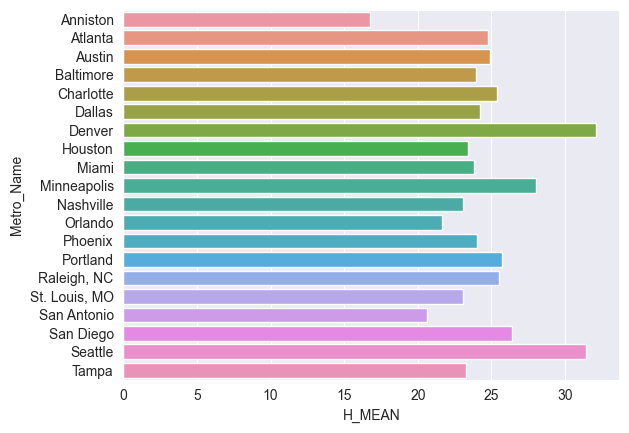

In [26]:
sns.barplot(x='H_MEAN',y='Metro_Name',data=occ)

<Axes: xlabel='TOT_EMP', ylabel='AREA_TITLE'>

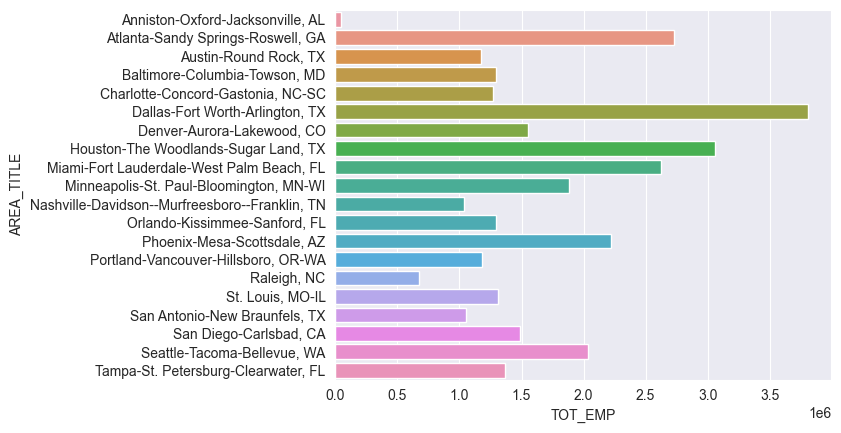

In [27]:
all_oc = data2[data2.OCC_TITLE == 'All Occupations']
sns.barplot(x='TOT_EMP',y='AREA_TITLE',data=all_oc)

In [29]:
import os
os.listdir('./debt')

['household-debt-by-msa.csv', 'cbsa-est2022.csv']

In [30]:
debt = pd.read_csv('./debt/household-debt-by-msa.csv')
csba_map = pd.read_csv('./debt/cbsa-est2022.csv',encoding='utf-8')

In [31]:
debt = pd.merge(debt,csba_map,left_on='cbsa',right_on='CBSA')

In [32]:
target_mssa = ['Miami-Fort Lauderdale-West Palm Beach, FL',
               'Dallas-Fort Worth-Arlington, TX',
               'Houston-The Woodlands-Sugar Land, TX',
               'Atlanta-Sandy Springs-Roswell, GA',
               'Phoenix-Mesa-Scottsdale, AZ',
               'Charlotte-Concord-Gastonia, NC-SC',
               'Minneapolis-St. Paul-Bloomington, MN-WI',
               'Portland-Vancouver-Hillsboro, OR-WA',
               'Orlando-Kissimmee-Sanford, FL',
               'Tampa-St. Petersburg-Clearwater, FL',
               'San Antonio-New Braunfels, TX' ,
               'Anniston-Oxford-Jacksonville, AL',
               'Seattle-Tacoma-Bellevue, WA',
               'Baltimore-Columbia-Towson, MD',
               'Denver-Aurora-Lakewood, CO',
               'Austin-Round Rock, TX',
               'St. Louis, MO-IL',
               'Nashville-Davidson--Murfreesboro--Franklin, TN',
               'San Diego-Carlsbad, CA',
               'Raleigh, NC'
               ]

In [33]:
debt = debt[debt.LSAD == 'Metropolitan Statistical Area']

In [34]:
debt = debt[debt.NAME.isin(target_mssa)]

In [35]:
debt_2023 = debt[debt.year==2023]

<Axes: xlabel='high', ylabel='NAME'>

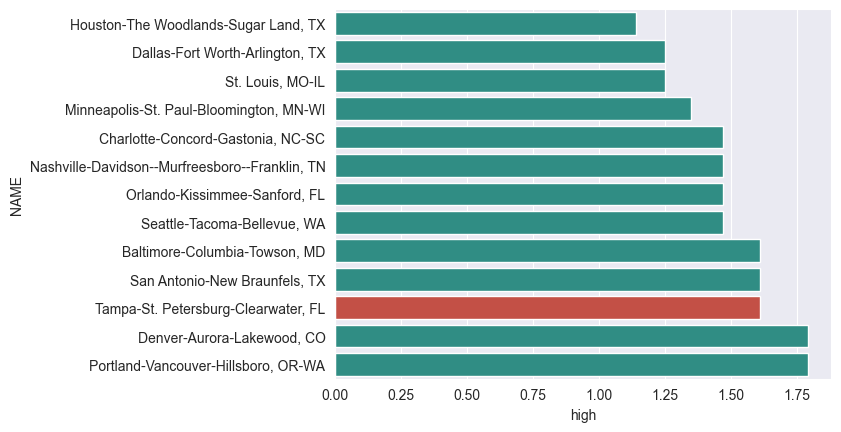

In [36]:
colors = ["#219C90" if x!='Tampa-St. Petersburg-Clearwater, FL' else "#D83F31" for x in debt_2023.sort_values(by='high').NAME]
sns.barplot(data = debt_2023, x='high',y='NAME',order=debt_2023.sort_values(by='high').NAME,palette=colors)

In [37]:
debt_last_2 = debt[debt.year>2018]


In [38]:
debt_last_2 = debt_last_2[debt_last_2.year>=2022].groupby(['year','NAME']).agg(high=('high','max')).reset_index()

In [39]:
debt_last_2['high_new'] = debt_last_2.groupby(['NAME']).shift(-1)['high']

In [41]:
df =pd.read_excel('./wage_increase/Wage-increase.xlsx')

In [42]:
wage_growth = df[df['Metropolitan area'].isin(debt.NAME.unique())]

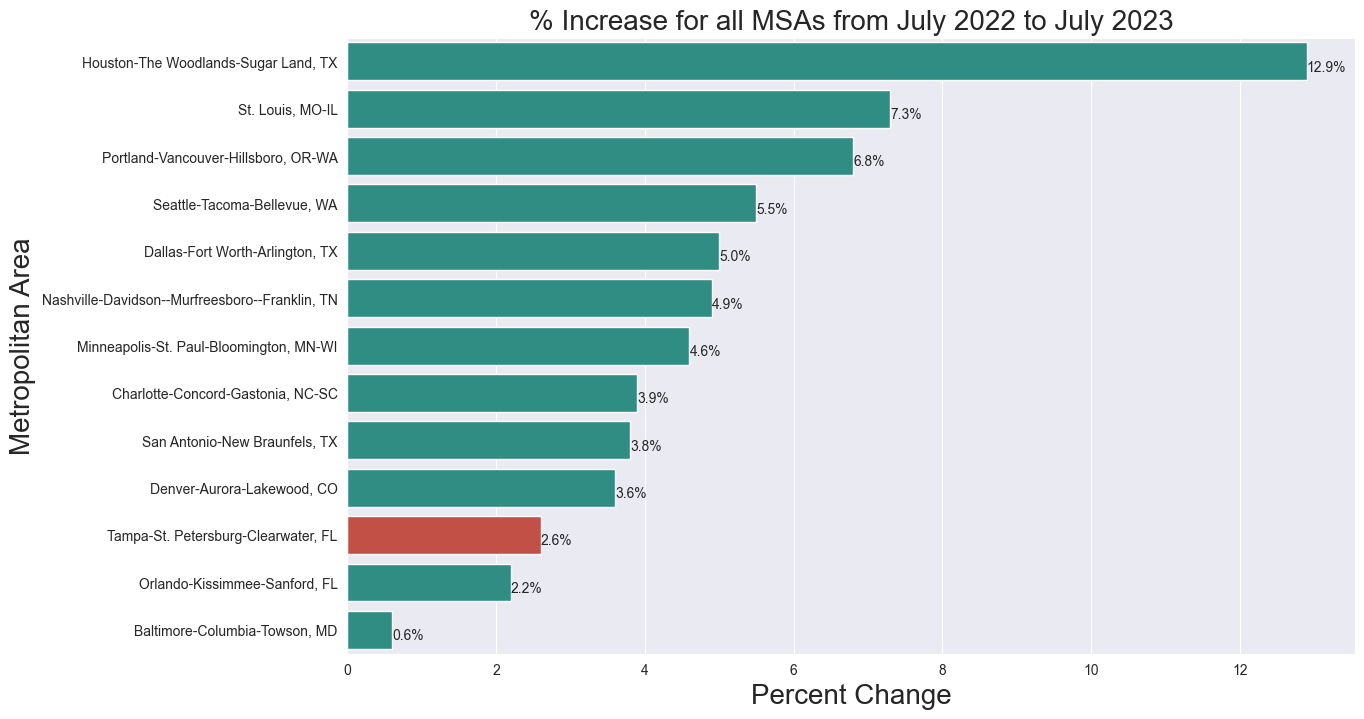

In [43]:
colors = ["#219C90" if x!='Tampa-St. Petersburg-Clearwater, FL' else "#D83F31" for x in wage_growth.sort_values(by='Percent change',ascending=False)['Metropolitan area']]
w = wage_growth.sort_values(by='Percent change',ascending=False)
plt.figure(figsize=(13, 8)) 
sns.barplot(data = wage_growth, x='Percent change',y='Metropolitan area',\
            order = w['Metropolitan area'],\
           palette=colors)
for i,j in enumerate(w['Percent change'].values):
    plt.text(x = j,y = i+0.2,s = "{}%".format(j))
plt.title("% Increase for all MSAs from July 2022 to July 2023",size=20)
plt.xlabel("Percent Change",size=20)
plt.ylabel("Metropolitan Area",size=20)
plt.show()

In [44]:
w = wage_growth.melt(id_vars='Metropolitan area')
w = w[w.variable !='Percent change']

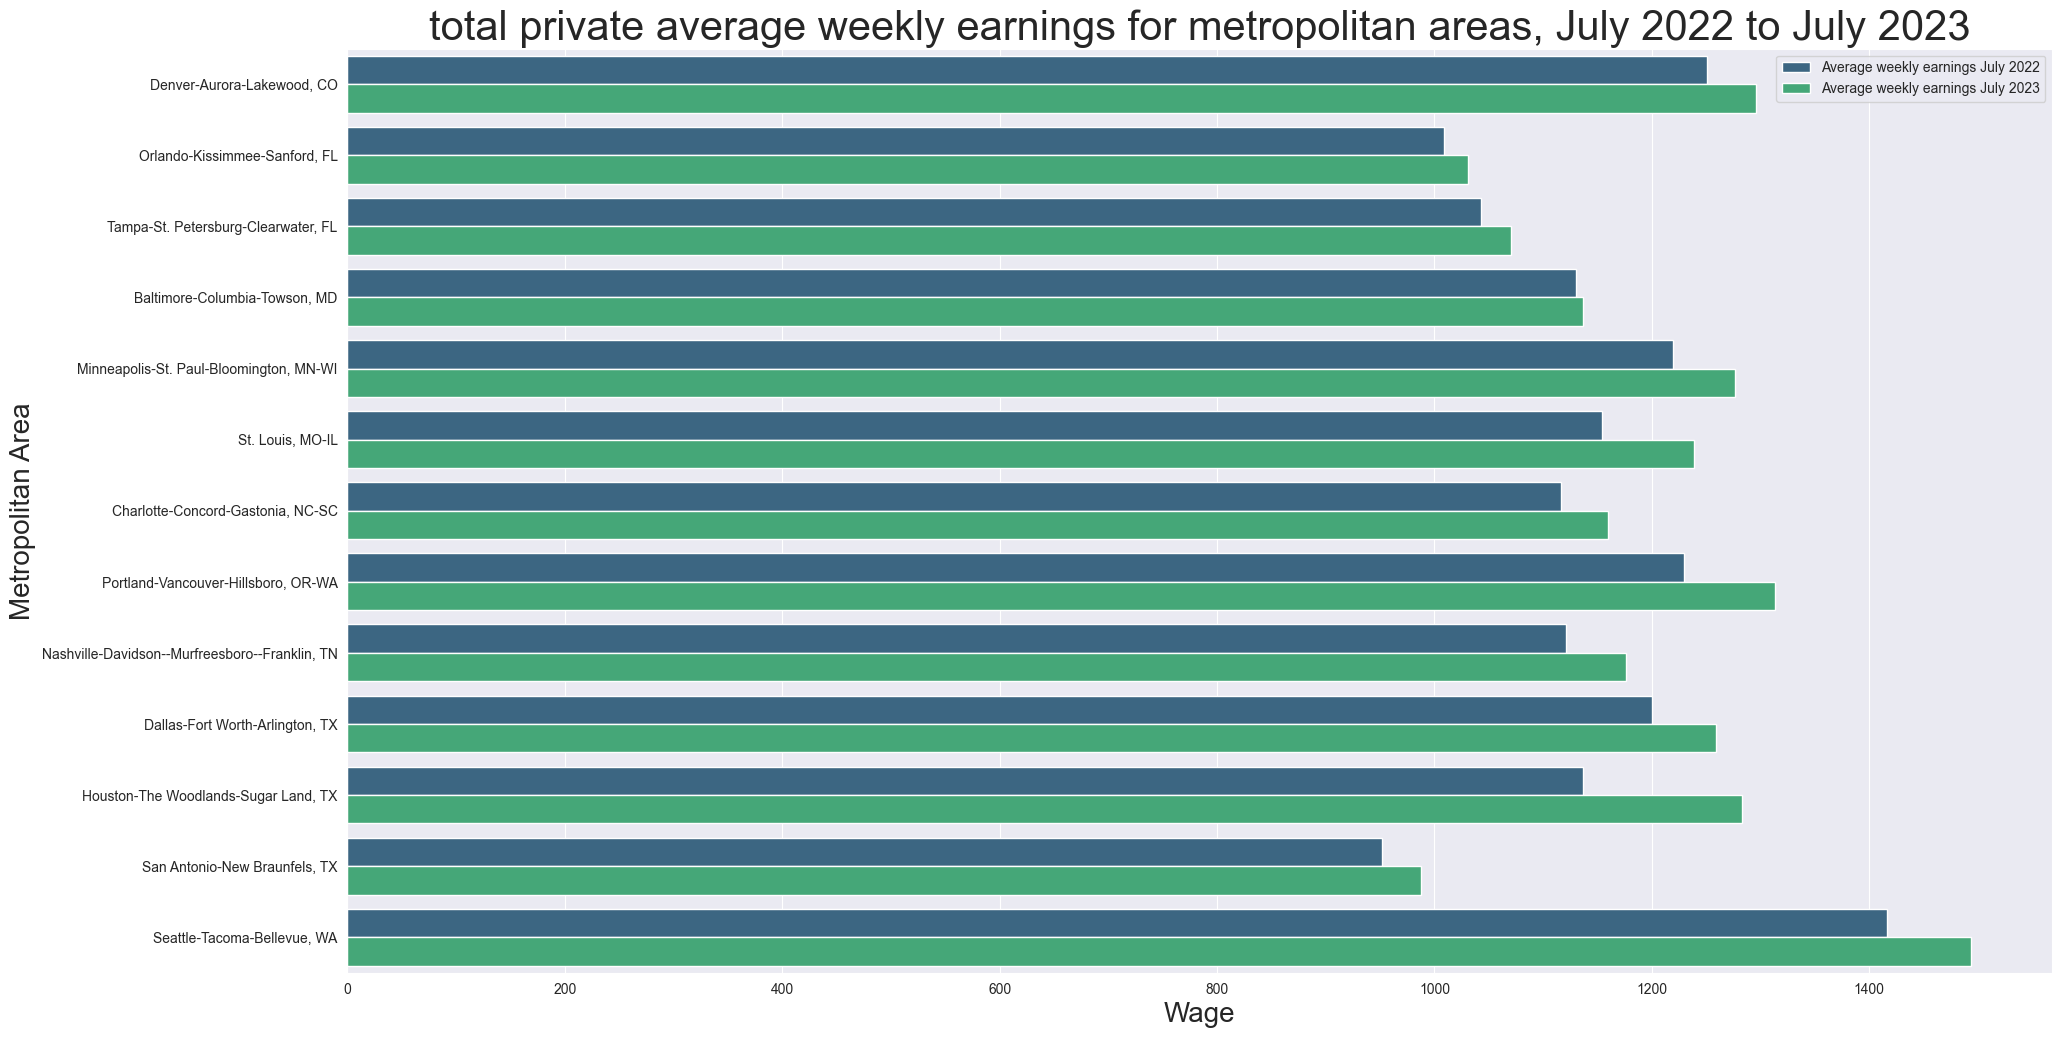

In [45]:
plt.figure(figsize=(22, 12)) 
sns.barplot(data = w, y='Metropolitan area',x='value',\
            hue='variable',palette='viridis')
plt.legend(loc='upper right', ncol=1)
plt.xlabel('Wage',size=20)
plt.title("total private average weekly earnings for metropolitan areas, July 2022 to July 2023",size=30)
plt.ylabel('Metropolitan Area',size=20)
plt.show()